In [1]:
import pandas as pd
import numpy as np
from plotnine import *
import patchworklib as pw
import os
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
os.chdir('D:\Studia\MoCaDR_proj1')

<Figure size 72x72 with 0 Axes>

# Results for many r’s

In [2]:
# SVD1
res_svd1 = pd.read_csv('Results/results_svd1.csv')
res_svd1_long = pd.melt(res_svd1, id_vars=['r'], value_vars=res_svd1.columns[1:])
best_r = res_svd1_long.iloc[res_svd1_long['value'].idxmin()]['r']
best_rmse = res_svd1_long['value'].min()
# SVD2
res_svd2 = pd.read_csv('Results/results_svd2.csv')
res_svd2_long = pd.melt(res_svd2, id_vars=['r'], value_vars=res_svd2.columns[1:])
best_r2 = res_svd2_long.iloc[res_svd2_long['value'].idxmin()]['r']
best_rmse2 = res_svd2_long['value'].min()
# NMF
res_nmf = pd.read_csv('Results/results_nmf.csv')
res_nmf_long = pd.melt(res_nmf, id_vars=['r'], value_vars=res_nmf.columns[1:])
best_r3 = res_nmf_long.iloc[res_nmf_long['value'].idxmin()]['r']
best_rmse3 = res_nmf_long['value'].min()

## SVD 1

In [3]:
plot_svd1_1 = ggplot(res_svd1_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD1") + \
    scale_color_discrete(labels=['0', 'Column means', 'Global mean', 'Weighted means', 'Row means'])
plot_svd1_2 = ggplot(res_svd1_long[res_svd1_long['variable'] != 'rmse_0']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD1") + \
    scale_color_discrete(labels=['Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_position='none')
plot_svd1_1.save('Report/fig/svd1_1.png')
plot_svd1_2.save('Report/fig/svd1_2.png')

# SVD2

In [4]:
plot_svd2_1 = ggplot(res_svd2_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD2") + \
    scale_color_discrete(labels=['0', 'Column means', 'Global mean', 'Weighted means', 'Row means'])
plot_svd2_2 = ggplot(res_svd2_long[res_svd2_long['variable'] != 'rmse_0']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="SVD2") + \
    scale_color_discrete(labels=['Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_position='none')
plot_svd2_1.save('Report/fig/svd2_1.png')
plot_svd2_2.save('Report/fig/svd2_2.png')

In [15]:
n = 10
res_svd2_long

,r,variable,value
0,1,rmse_0,3.095144
1,2,rmse_0,3.006560
2,3,rmse_0,2.943416
3,4,rmse_0,2.903454
4,5,rmse_0,2.877835
...,...,...,...
495,96,rmse_col_means,0.957780
496,97,rmse_col_means,0.959530
497,98,rmse_col_means,0.958531
498,99,rmse_col_means,0.958267


# NMF

In [5]:
plot_nmf_1 = ggplot(res_nmf_long) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="NMF") + \
    scale_color_discrete(labels=['0', 'Column means', 'Global mean', 'Weighted means', 'Row means'])
plot_nmf_2 = ggplot(res_nmf_long[res_nmf_long['variable'] != 'rmse_0']) + \
    theme_bw() + \
    geom_line(aes(x='r', y='value', color='variable')) + \
    labs(y="RMSE", color="Imputation method", title="NMF") + \
    scale_color_discrete(labels=['Column means', 'Global mean', 'Weighted means', 'Row means']) + \
    theme(legend_position='none')
plot_nmf_1.save('Report/fig/nmf_1.png')
plot_nmf_2.save('Report/fig/nmf_2.png')

# Stop condition for SVD2

In [6]:
res_svd2_stop = pd.read_csv('Results/results_stop_svd2.csv')

In [7]:
n = 10
res_svd2_stop.loc[res_svd2_stop.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

,stop,r,RMSE
378,0.0086,9,0.879578
356,0.0085,9,0.880032
400,0.0087,9,0.880051
421,0.0088,8,0.880321
232,0.0079,17,0.880356
399,0.0087,8,0.880363
210,0.0078,17,0.880485
299,0.0082,18,0.880578
275,0.0081,16,0.880597
384,0.0086,15,0.880600


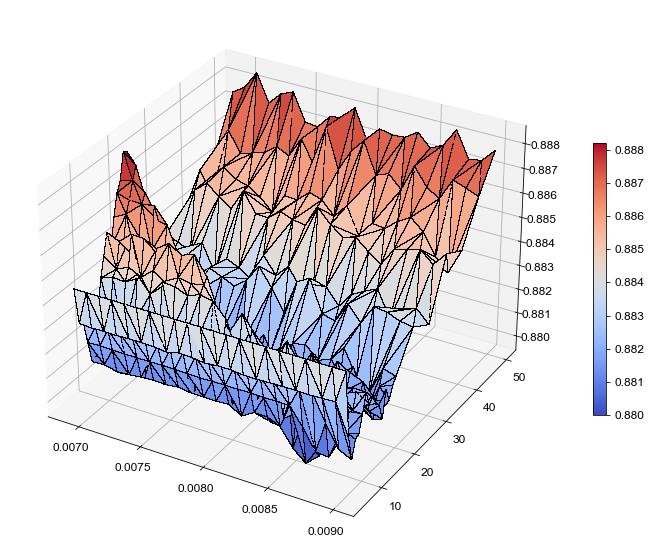

In [8]:
X, Y, Z = res_svd2_stop.T.values
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm, edgecolor ='black', linewidth=0.005, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)

# Two-dimensional minimization: r, col_weight

In [3]:
res_svd1_3d = pd.read_csv('Results/results_r_w_svd1.csv')
res_svd2_3d = pd.read_csv('Results/results_r_w_svd2.csv')
res_nmf_3d = pd.read_csv('Results/results_r_w_nmf.csv')

## SVD1

In [10]:
n = 10
res_svd1_3d.loc[res_svd1_3d.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

,col_weight,r,RMSE
423,0.39,10,0.873987
401,0.38,10,0.874244
489,0.42,10,0.874274
357,0.36,10,0.874449
424,0.39,11,0.874469
379,0.37,10,0.874475
467,0.41,10,0.874490
445,0.40,10,0.874498
466,0.41,9,0.874507
470,0.41,13,0.874532


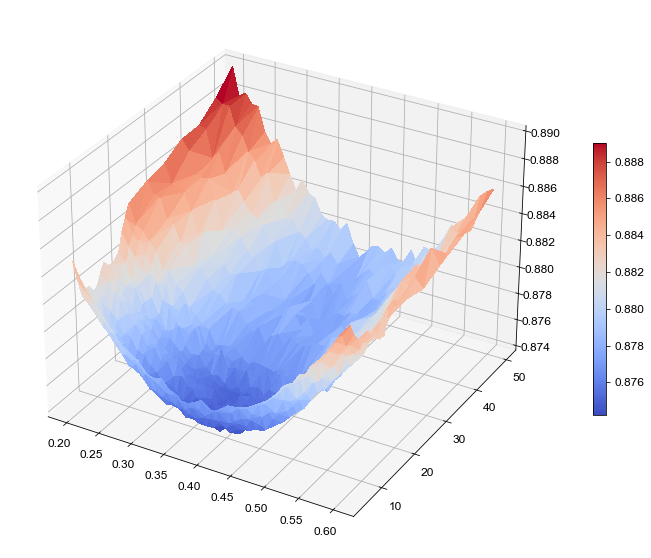

In [19]:
X, Y, Z = res_svd1_3d.T.values
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm, edgecolor ='black', linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)
ax.set_xlabel('Column weight', fontsize=17, color='red', labelpad=10)
ax.set_ylabel('$r$', fontsize=17, color='red', labelpad=10)
ax.set_zlabel('RMSE', rotation=-90, fontsize=17, color='red', labelpad=10)
plt.savefig('Report/fig/svd1_r_w.png')

## SVD2

In [4]:
n = 10
res_svd2_3d.loc[res_svd2_3d.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

,col_weight,r,RMSE
73,0.25,8,0.867393
87,0.26,8,0.867397
59,0.24,8,0.867402
101,0.27,8,0.867410
115,0.28,8,0.867494
45,0.23,8,0.867501
31,0.22,8,0.867509
129,0.29,8,0.867578
17,0.21,8,0.867675
143,0.30,8,0.867697


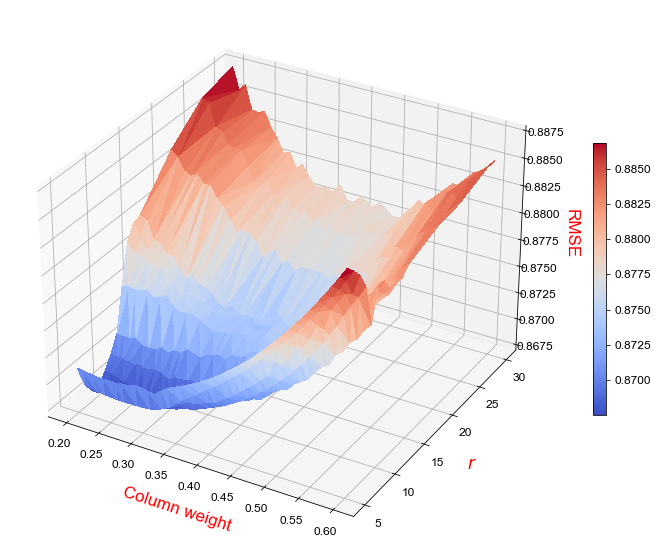

In [33]:
X2, Y2, Z2 = res_svd2_3d.T.values
fig = plt.figure(figsize=(15,10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X2, Y2, Z2, cmap=cm.coolwarm, edgecolor ='black', linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)
ax.set_xlabel('Column weight', fontsize=17, color='red', labelpad=10)
ax.set_ylabel('$r$', fontsize=17, color='red', labelpad=10)
ax.set_zlabel('RMSE', rotation=-90, fontsize=17, color='red', labelpad=10)
plt.savefig('Report/fig/svd2_r_w.png')

## NMF

In [ ]:
n = 10
res_nmf_3d.loc[res_nmf_3d.apply(lambda x: pd.Series(x.nsmallest(n).index))['RMSE']]

In [ ]:
X3, Y3, Z3 = res_svd1_3d.T.values
fig = plt.figure(figsize=(15, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(X3, Y3, Z3, cmap=cm.coolwarm, edgecolor='black', linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=20)
ax.set_xlabel('Column weight', fontsize=17, color='red', labelpad=10)
ax.set_ylabel('$r$', fontsize=17, color='red', labelpad=10)
ax.set_zlabel('RMSE', rotation=-90, fontsize=17, color='red', labelpad=10)
plt.savefig('Report/fig/svd2_r_w.png')

# Repeating